In [2]:
library(ggbiplot)
library(factoextra)
library(corrplot)
library(NbClust)
library(FunCluster)
library(pca3d)
library(e1071)
library(poLCA)
library(reshape2)
library(psych)
library(DescTools)
library(paran)

In [3]:
s123 <- read.csv("C:\\Users\\marpr\\Desktop\\docto\\respuestas-s123 - copia.csv", sep=',')
s123 <- data.frame(s123)
s1 <- s123[,1:4]
s3 <- s123[,5:7]
s2 <- s123[,8:9]
s1 = data.frame(rank(s1$s1.High), rank(s1$s1.Medium.High), rank(s1$s1.Medium.Low), rank(s1$s1.Low))
s3 = data.frame(rank(s3$S3.1), rank(s3$S3.2), rank(s3$S3.3))
s2 = data.frame(rank(s2$s2.Relatively.High), rank(s2$s2.Relatively.Low))


Using eigendecomposition of correlation matrix.
Computing: 20%  40%  60%  80%  100%


Results of Horn's Parallel Analysis for factor retention
45 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           1.405049    1.876046      0.470996
2           0.291734    0.429492      0.137757
3          -0.066223   -0.13738     -0.07115
4           0.034407   -0.20447     -0.23887
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(2 factors    retained)



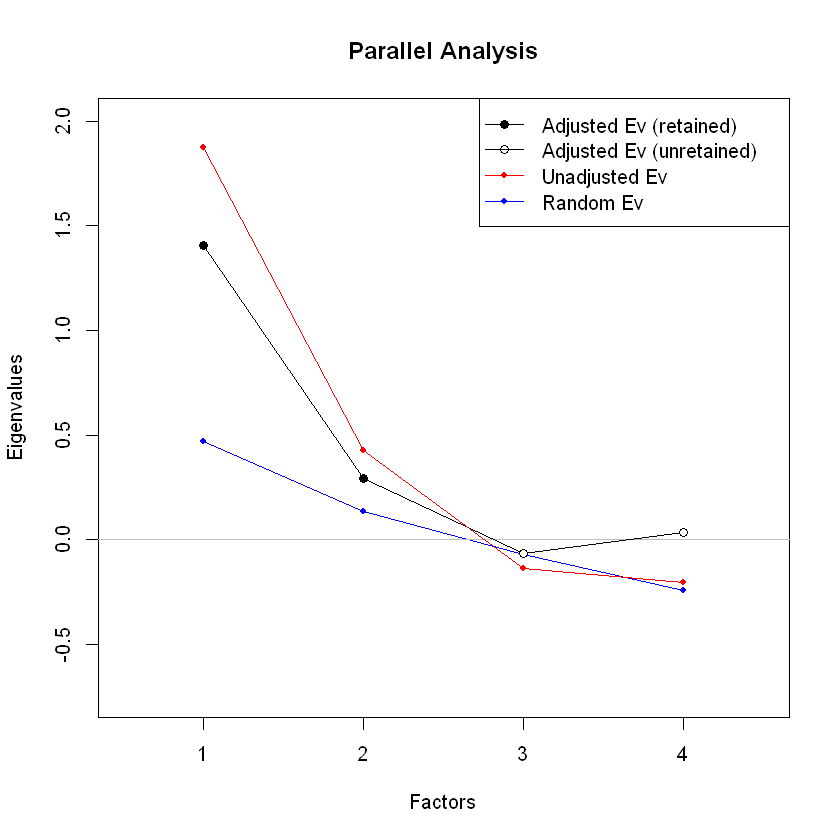

In [10]:
# png('S1_parallel.png', width = 5,
#   height    = 5,
#   units     = "in",
#   res       = 1000,
#   pointsize = 8)

paran(s1, iterations = 45, centile = 0, quietly = FALSE, 
    status = TRUE, all = TRUE, cfa = TRUE, graph = TRUE, color = TRUE, 
    col = c("black", "red", "blue"), lty = c(1, 2, 3), lwd = 1, legend = TRUE, 
    file = "", width = 2000, height = 2000, grdevice = "png", seed = 0)

# dev.off()


Using eigendecomposition of correlation matrix.
Computing: 20%  40%  60%  80%  100%


Results of Horn's Parallel Analysis for factor retention
45 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           1.751484    1.924849      0.173364
2           0.089111   -0.02462     -0.11373
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(2 factors    retained)



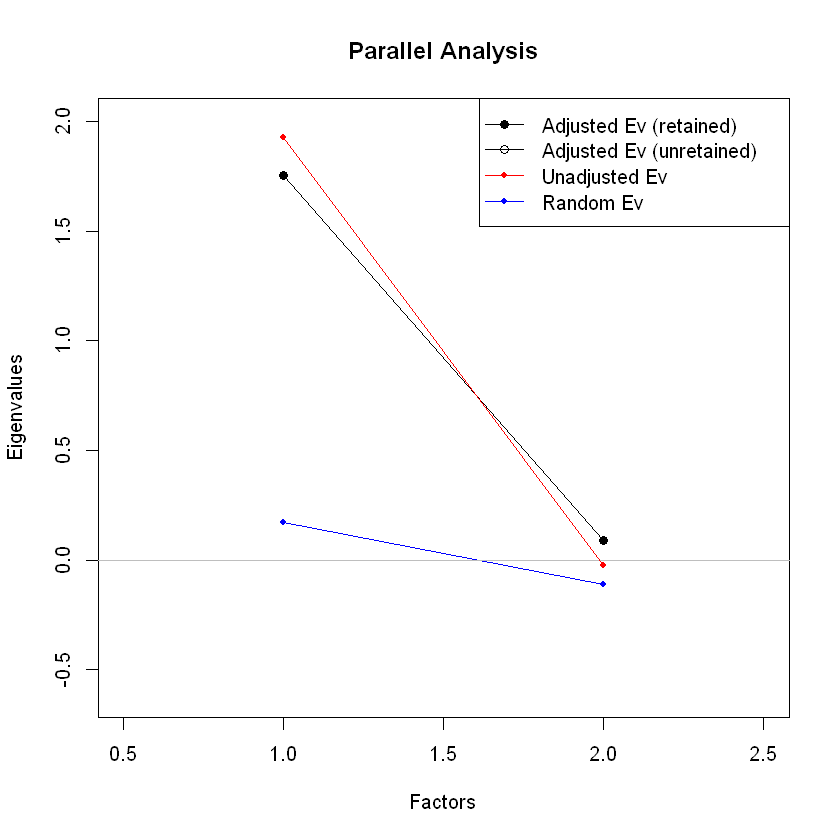

In [11]:
# png('S2_parallel.png', width = 5,
#   height    = 5,
#   units     = "in",
#   res       = 1000,
#   pointsize = 8)

paran(s2, iterations = 45, centile = 0, quietly = FALSE, 
    status = TRUE, all = TRUE, cfa = TRUE, graph = TRUE, color = TRUE, 
    col = c("black", "red", "blue"), lty = c(1, 2, 3), lwd = 1, legend = TRUE, 
    file = "", width = 2000, height = 2000, grdevice = "png", seed = 0)

# dev.off()


Using eigendecomposition of correlation matrix.
Computing: 20%  40%  60%  80%  100%


Results of Horn's Parallel Analysis for factor retention
45 iterations, using the mean estimate

-------------------------------------------------- 
Factor      Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
No components passed. 
-------------------------------------------------- 
1           1.387699    1.677881      0.290181
2           0.268262    0.281395      0.013132
3          -0.025640   -0.20254     -0.17690
-------------------------------------------------- 

Adjusted eigenvalues > 0 indicate dimensions to retain.
(2 factors    retained)



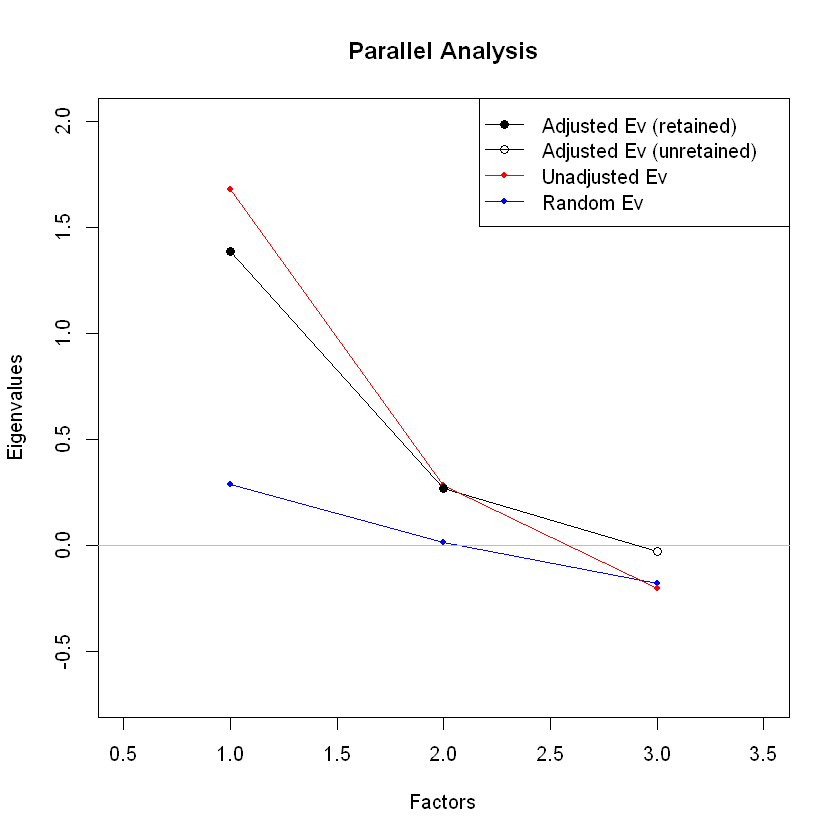

In [12]:
# png('S3_parallel.png', width = 5,
#   height    = 5,
#   units     = "in",
#   res       = 1000,
#   pointsize = 8)

paran(s3, iterations = 45, centile = 0, quietly = FALSE, 
    status = TRUE, all = TRUE, cfa = TRUE, graph = TRUE, color = TRUE, 
    col = c("black", "red", "blue"), lty = c(1, 2, 3), lwd = 1, legend = TRUE, 
    file = "", width = 2000, height = 2000, grdevice = "png", seed = 0)

# dev.off()